In [32]:
# import liberies

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# read in he data

df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Portfolio\Pregnancy.csv')

In [2]:
# look at the data

df.head()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec-20,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec-20,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct-20,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


# Data Cleaning:

1. Check for any missing values in the columns of interest (Household_Income, Maternal_Education).
2. Drop rows with missing values.

In [3]:
# Check for missing values

missing_values = df[['Household_Income', 'Maternal_Education']].isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Household_Income      251
Maternal_Education    177
dtype: int64


In [7]:
# Drop rows with missing values

df_cleaned = df.dropna(subset=['Household_Income', 'Maternal_Education'])

# Exploratory Data Analysis (EDA):

1. Visualize the distribution of household income and maternal education levels.

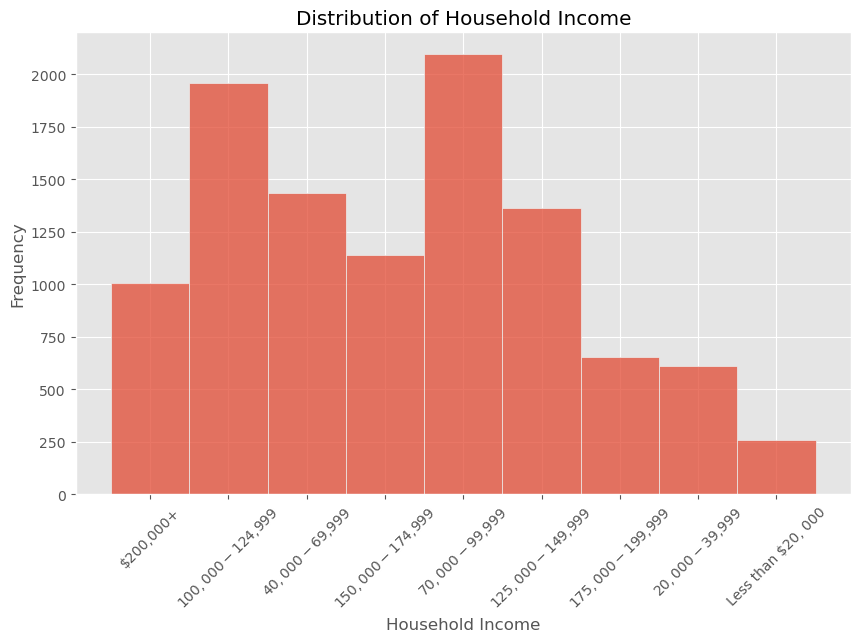

In [16]:
# Plot histogram of household income

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Household_Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.title('Distribution of Household Income')
plt.xticks(rotation=45)
plt.show()

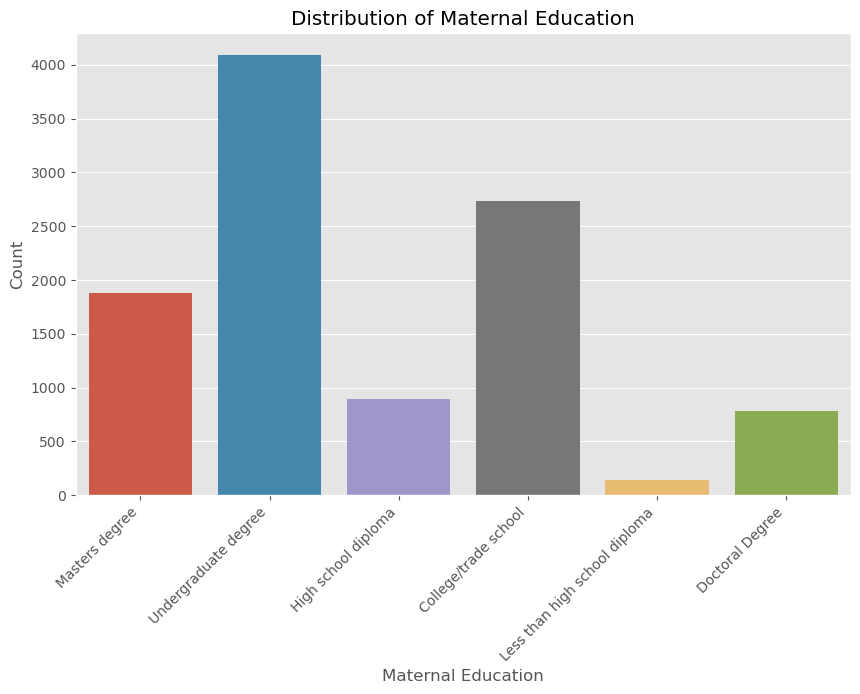

In [17]:
# Plot countplot of maternal education

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Maternal_Education')
plt.xlabel('Maternal Education')
plt.ylabel('Count')
plt.title('Distribution of Maternal Education')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation Analysis:

1. Calculate the correlation coefficient between household income and maternal mental health scores.

In [30]:
# Replace 'Less than 20 000' with a numeric value (you can choose any appropriate value)

df_cleaned['Household_Income'] = df_cleaned['Household_Income'].replace('Less than 20 000', 20000)

# Convert remaining values to numerical

df_cleaned['Household_Income'] = df_cleaned['Household_Income'].str.split('-').str[-1].astype(float)

# Calculate correlation coefficient

correlation = df_cleaned['Household_Income'].corr(df_cleaned['Edinburgh_Postnatal_Depression_Scale'])
print("Correlation coefficient between Household Income and Maternal Mental Health Scores:", correlation)

Correlation coefficient between Household Income and Maternal Mental Health Scores: -0.18048707773800618


# Comparison of Mental Health Outcomes:

1. Group the data based on maternal education levels.
2. Calculate summary statistics and visualize the distribution of mental health scores for each education group.

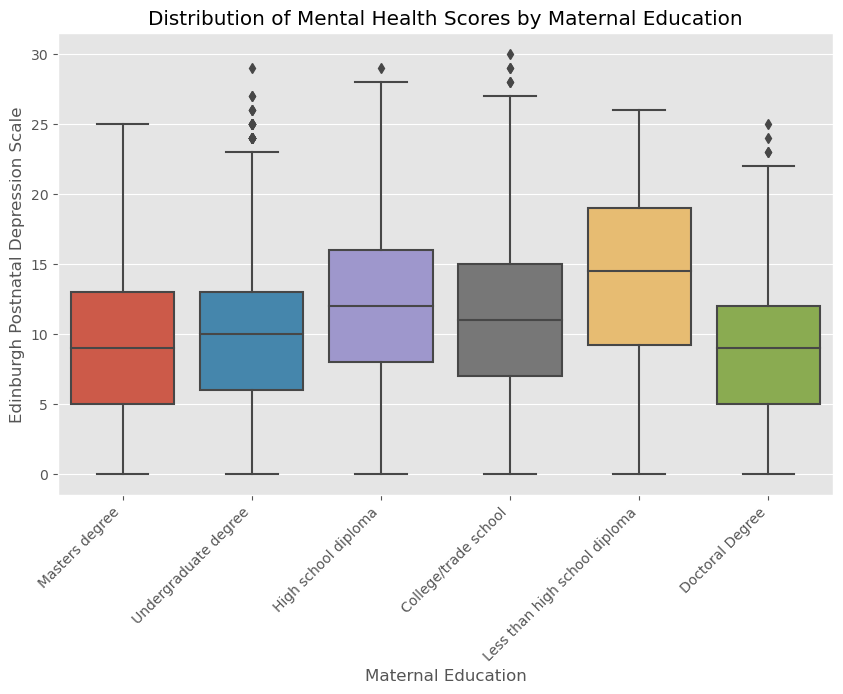

In [31]:
# Group data by maternal education and calculate mean mental health scores

mental_health_summary = df_cleaned.groupby('Maternal_Education')['Edinburgh_Postnatal_Depression_Scale'].mean().reset_index()

# Visualize the distribution of mental health scores by maternal education

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Maternal_Education', y='Edinburgh_Postnatal_Depression_Scale')
plt.xlabel('Maternal Education')
plt.ylabel('Edinburgh Postnatal Depression Scale')
plt.title('Distribution of Mental Health Scores by Maternal Education')
plt.xticks(rotation=45, ha='right')
plt.show()

# Statistical Testing :

1. Perform hypothesis tests to compare mental health outcomes between different education groups.

In [33]:
# Perform statistical tests (e.g., t-test)


education_groups = df_cleaned['Maternal_Education'].unique()
for edu_group1 in education_groups:
    for edu_group2 in education_groups:
        if edu_group1 != edu_group2:
            group1_scores = df_cleaned[df_cleaned['Maternal_Education'] == edu_group1]['Edinburgh_Postnatal_Depression_Scale']
            group2_scores = df_cleaned[df_cleaned['Maternal_Education'] == edu_group2]['Edinburgh_Postnatal_Depression_Scale']
            t_stat, p_value = ttest_ind(group1_scores, group2_scores)
            print("T-test between", edu_group1, "and", edu_group2, ":", "T-statistic =", t_stat, "P-value =", p_value)

T-test between Masters degree and Undergraduate degree : T-statistic = nan P-value = nan
T-test between Masters degree and High school diploma : T-statistic = nan P-value = nan
T-test between Masters degree and College/trade school : T-statistic = nan P-value = nan
T-test between Masters degree and Less than high school diploma : T-statistic = nan P-value = nan
T-test between Masters degree and Doctoral Degree : T-statistic = nan P-value = nan
T-test between Undergraduate degree and Masters degree : T-statistic = nan P-value = nan
T-test between Undergraduate degree and High school diploma : T-statistic = nan P-value = nan
T-test between Undergraduate degree and College/trade school : T-statistic = nan P-value = nan
T-test between Undergraduate degree and Less than high school diploma : T-statistic = nan P-value = nan
T-test between Undergraduate degree and Doctoral Degree : T-statistic = nan P-value = nan
T-test between High school diploma and Masters degree : T-statistic = nan P-valu